In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [23]:
df=pd.read_csv(r'D:\decessiontreesvm\Iris.csv')

In [24]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
df.select_dtypes(include='number').skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [27]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [28]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

In [30]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [33]:
model1=SVC(kernel='linear')
model1.fit(x_train,y_train)
pred_y=model1.predict(x_test)

0.9666666666666667
0.9722222222222222
0.9629629629629629
0.9658994032395567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



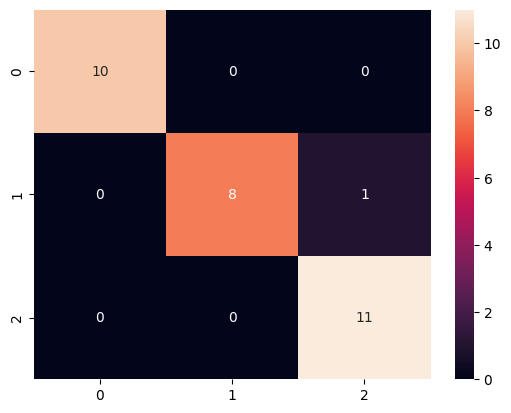

In [34]:
print(accuracy_score(y_test,pred_y))
print(precision_score(y_test,pred_y,average='macro'))
print(recall_score(y_test,pred_y,average='macro'))
print(f1_score(y_test,pred_y,average='macro'))
print(classification_report(y_test,pred_y))
cm=confusion_matrix(y_test,pred_y)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [35]:
model2=SVC(kernel='poly')
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)

0.9666666666666667
0.9666666666666667
0.9696969696969697
0.9665831244778612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



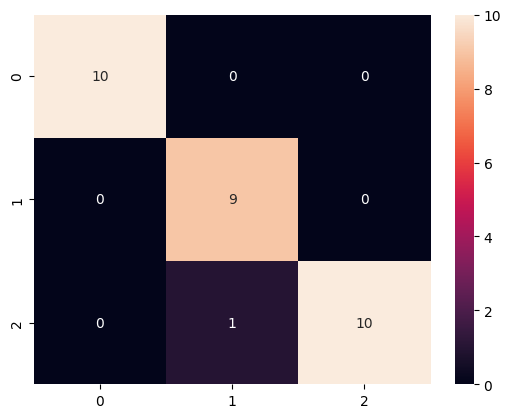

In [36]:
print(accuracy_score(y_test,pred_y2))
print(precision_score(y_test,pred_y2,average='macro'))
print(recall_score(y_test,pred_y2,average='macro'))
print(f1_score(y_test,pred_y2,average='macro'))
cm2=confusion_matrix(y_test,pred_y2)
print(classification_report(y_test,pred_y2))
sns.heatmap(cm2,annot=True,fmt='d')
plt.show()

In [37]:
model3=SVC(kernel='rbf')
model3.fit(x_train,y_train)
pred_y3=model3.predict(x_test)

1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



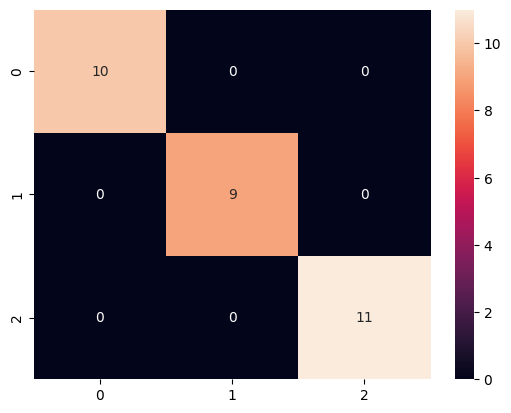

In [38]:
print(accuracy_score(y_test,pred_y3))
print(precision_score(y_test,pred_y3,average='macro'))
print(recall_score(y_test,pred_y3,average='macro'))
print(f1_score(y_test,pred_y3,average='macro'))
cm3=confusion_matrix(y_test,pred_y3)
print(classification_report(y_test,pred_y3))
sns.heatmap(cm3,annot=True,fmt='d')
plt.show()

In [40]:
import pickle
pickle.dump(model1, open('model.pkl', 'wb'))
pickle.dump(Scaler, open('scaler.pkl', 'wb'))